# Risk Stratification Poblem Analysis And ML Modelling

Import importent libraries

In [1]:
import IPython
import pandas as pd
import numpy as np
from statistics import mode
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Read given data file to a pandas dataframe
df = pd.read_csv("diabetic_data.csv")

In [3]:
print('No of rows in the data :',df.shape[0])

No of rows in the data : 101766


In [4]:
print('No of Columns in the data :',df.shape[1])

No of Columns in the data : 50


### Let us see few rows of the data to have a feel

In [5]:
df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Let us see how many unique values each column has

In [6]:
# for each column
for col in list(df.columns):
    
    # get a list of unique values
    list_of_unique_values = df[col].unique()
    
    # if number of unique values is less than 25, print the values. Otherwise print the number of unique values
    if len(list_of_unique_values)<25:
        print(col)
        print(list_of_unique_values)
    else:
        print(col + ': ' +str(len(list_of_unique_values)) + ' unique values')

encounter_id: 101766 unique values
patient_nbr: 71518 unique values
race
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
gender
['Female' 'Male' 'Unknown/Invalid']
age
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
admission_type_id
[6 1 2 3 4 5 8 7]
discharge_disposition_id: 26 unique values
admission_source_id
[ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
time_in_hospital
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
payer_code
['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
medical_specialty: 73 unique values
num_lab_procedures: 118 unique values
num_procedures
[0 5 1 6 2 3 4]
num_medications: 75 unique values
number_outpatient: 39 unique values
number_emergency: 33 unique values
number_inpatient
[ 0  1  2  3  6  5  4  7  8  9 15 10 11 14 12 13 17 16 21 18 1

### Missing values

##### There are many '?' in the data set. These are missing values. Let us count them

In [7]:
for col in df.columns:
    if df[col].dtype == object and df[col][df[col] == '?'].count()>0:
         print(col,':',df[col][df[col] == '?'].count(),':',round((df[col][df[col] == '?'].count()/len(df))*100),'%')

race : 2273 : 2.0 %
weight : 98569 : 97.0 %
payer_code : 40256 : 40.0 %
medical_specialty : 49949 : 49.0 %
diag_1 : 21 : 0.0 %
diag_2 : 358 : 0.0 %
diag_3 : 1423 : 1.0 %


Weight is missing in over 97% records. Owing to the poor interpretability of missing values and little predictive generalizability to other patients, best thing is to just drop it. Payer code and Medical Specialty of treating physician also have 40–50% missing values. We can simply drop them

In [8]:
# drop columns with too many missing values
df = df.drop(columns=["payer_code", "weight", "medical_specialty"]) 

Noticed that for two variables (drugs named citoglipton and examide), all records have the same value. So essentially these cannot provide any interpretive or discriminatory information for predicting readmission, and we can drop these columns as well. 

### Finding duplicate rows and columns

In [9]:
# Finding duplicate rows
df.duplicated().sum()

0

In [10]:
# Finding duplicate columns by taking the transpose of rows, as in general, duplicated() function works on rows
df.T.duplicated()

encounter_id                False
patient_nbr                 False
race                        False
gender                      False
age                         False
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                      False
diag_2                      False
diag_3                      False
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide               False
glipizide                   False
glyburide                   False
tolbutamide   

In [11]:
# Dropping the duplicate column "citoglipton"
df = df.drop(columns=["citoglipton"])

Primary (diag_1), Secondary (diag_2) and Additional (diag_3) diagnoses were have very few missing values. Technically, if all three are missing, that’s bad data. So we only drop those records where all three diagnoses are missing.
Gender has only 3 missing or invalid values so let us drop these records.

In [12]:
drop_Idx = set(df[(df['diag_1'] == '?') & (df['diag_2'] == '?') & (df['diag_3'] == '?')].index)
drop_Idx = drop_Idx.union(set(df['gender'][df['gender'] == 'Unknown/Invalid'].index))
# drop died patient data which 'discharge_disposition_id' == 11 | 19 | 20 | 21 indicates 'Expired'
#drop_ID = drop_ID.union(set(df[(df['discharge_disposition_id'] == 11) | (df['discharge_disposition_id'] == 19) | \
                               #(df['discharge_disposition_id'] == 20) | (df['discharge_disposition_id'] == 21)].index))
new_Idx = list(set(df.index) - set(drop_Idx))
df = df.iloc[new_Idx]

Only 2% of the race data are missing and we can get rid of all such records without much loss of information.

In [13]:
df = df[df.race != '?']

In [14]:
for col in df.columns:
    if df[col].dtype == object and df[col][df[col] == '?'].count()>0:
         print(col,':',df[col][df[col] == '?'].count(),':',round((df[col][df[col] == '?'].count()/len(df))*100),'%')

diag_1 : 18 : 0.0 %
diag_2 : 335 : 0.0 %
diag_3 : 1348 : 1.0 %


## Target Variable

We want to know whether a patient gets readmitted to the hospital  or not. The variable actually has < 30, > 30 and No Readmission categories. To reduce our problem to a binary classification, we combined the readmission before 30 days and after 30 days into one category(assign 1) and no readmission into another category(assign 0):

In [15]:
df['readmitted'] = df['readmitted'].replace('>30', 1)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)
# Convert all values to int
df['readmitted'] = df['readmitted'].astype(int)

## Plots

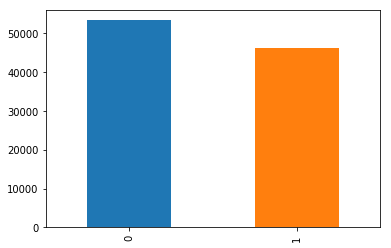

In [16]:
df['readmitted'].value_counts().plot.bar()

In [17]:
df['readmitted'].value_counts()

0    53315
1    46176
Name: readmitted, dtype: int64

In [18]:
df.shape

(99491, 46)

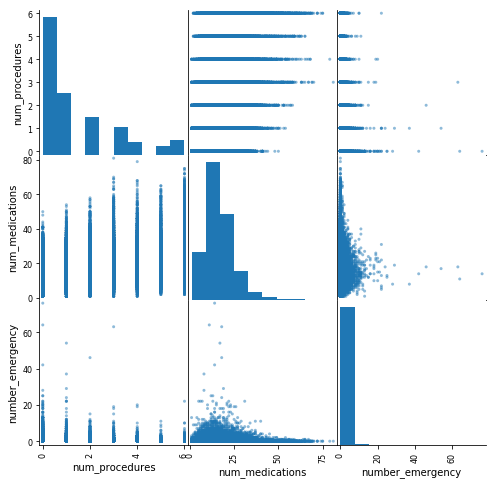

In [19]:
# Let's see the relationship between different variables to understand the data and if there is a strong correlation between 
#two variables then we can consider one of them.
import seaborn as sns
sm = pd.plotting.scatter_matrix(df[['num_procedures', 'num_medications', 'number_emergency']], figsize = (8, 8))
sns.despine()

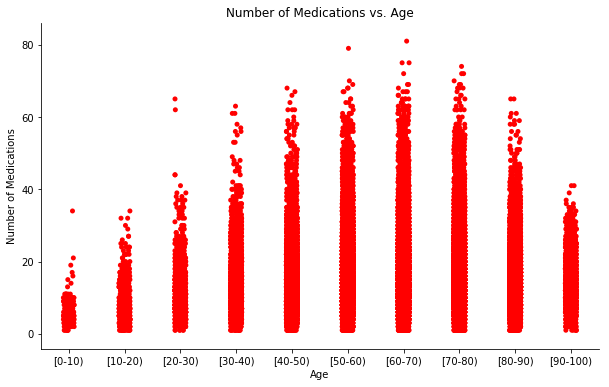

In [20]:
#Let's try to see how the age and number of medicines vary,
sortage = df.sort_values(by = 'age')
x = sns.stripplot(x = "age", y = "num_medications", data = sortage, color = 'red')
sns.despine() #remove top and right axes
x.figure.set_size_inches(10, 6)
x.set_xlabel('Age')
x.set_ylabel('Number of Medications')
x.axes.set_title('Number of Medications vs. Age')
plt.show()

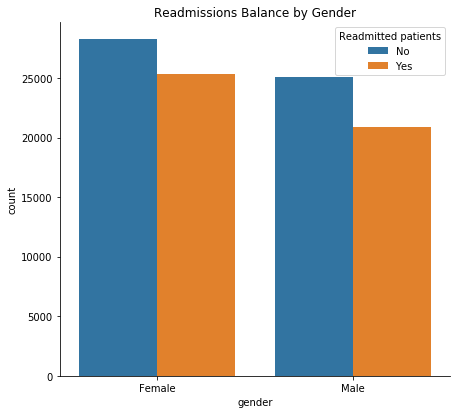

In [21]:
#Gender and Readmissions,
plot1 = sns.countplot(x = 'gender', hue = 'readmitted', data = df) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by Gender')
plt.show()

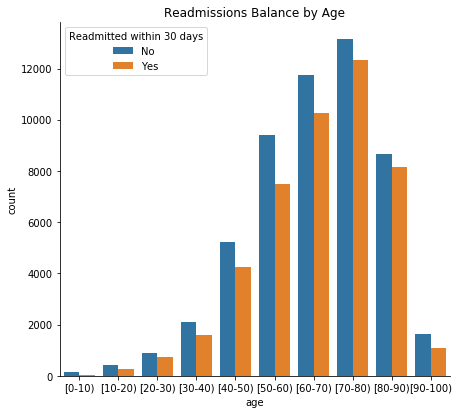

In [22]:
#Relation between age and readmission,

b = df.age.unique()
b.sort()
b_sort = np.array(b).tolist()


ageplt = sns.countplot(x = 'age', hue = 'readmitted', data = df, order = b_sort) 

sns.despine()
ageplt.figure.set_size_inches(7, 6.5)
ageplt.legend(title = 'Readmitted within 30 days', labels = ('No', 'Yes'))
ageplt.axes.set_title('Readmissions Balance by Age')
plt.show()

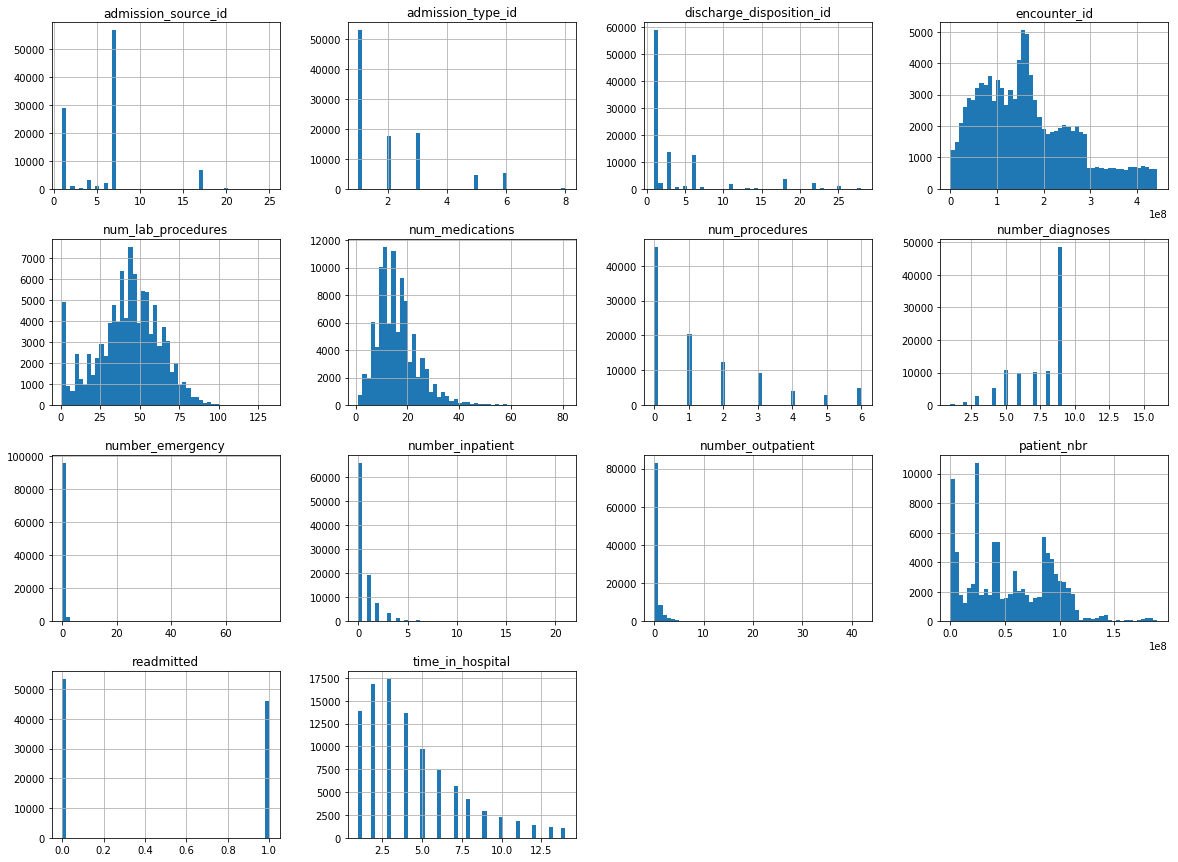

In [23]:
#Plotting the numerical variables in our dataset,

%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

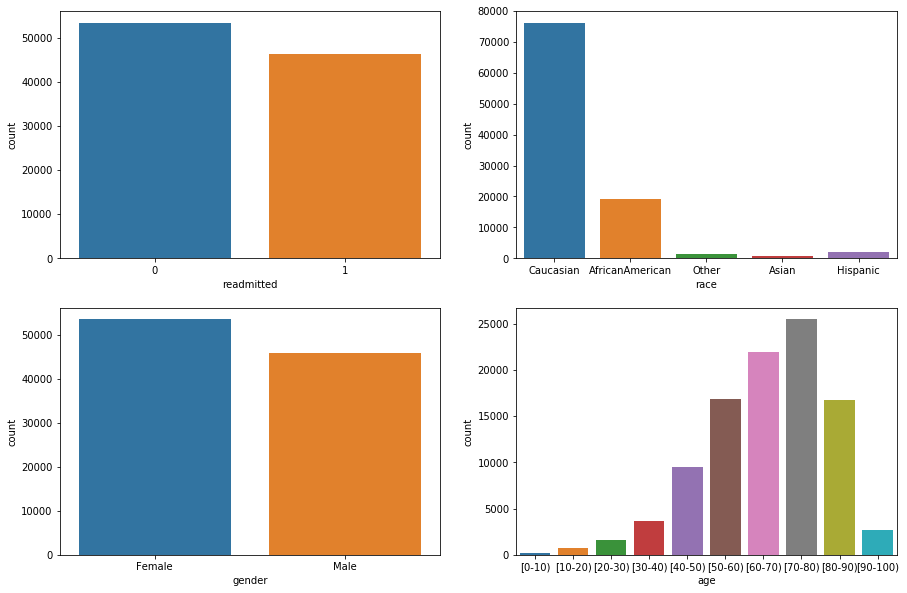

In [24]:
#Exploring the categorical variables,

import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10), ncols=2, nrows=2)

sns.countplot(x="readmitted", data=df, ax=ax[0][0])
sns.countplot(x="race", data=df, ax=ax[0][1])
sns.countplot(x="gender", data=df, ax=ax[1][0])
sns.countplot(x="age", data=df, ax=ax[1][1])

###### If we look at the IDs_mapping.csv we can see that  discharge_disposition_id  11,13,14,19,20,21 are related to death or hospice. We should remove these samples from the predictive model.

In [25]:
df = df.loc[~df.discharge_disposition_id.isin([11,13,14,19,20,21])]

In [26]:
df.shape

(97108, 46)

## Feature Engineering

In [27]:
df['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

The dataset only gives us age as 10 year categories, so we don’t know the exact age of each patient.  we assume that age of the patient on average lies at the midpoint of the age category. For example, if the patient’s age category is 20–30 years, then we assume the age = 25 years. So we converted age categories to midpoints, resulting in a numeric variable:

In [28]:
age_dict = {"[0-10)":5, "[10-20)":15, "[20-30)":25, "[30-40)":35, "[40-50)":45, 
            "[50-60)":55, "[60-70)":65, "[70-80)":75, "[80-90)":85, "[90-100)":95 }
df['age'] = df.age.map(age_dict)
df['age'] = df['age'].astype('int64')

In [29]:
print(df.age.value_counts())

75    24743
65    21572
55    16701
85    16049
45     9389
35     3688
95     2522
25     1603
15      682
5       159
Name: age, dtype: int64


#### A closer look to IDs_mapping.csv  will reveal that 'admission_type_id' ,'discharge_disposition_id' and 'admission_source_id' have values with similar meaning. They can be merged to have fewer values

In [30]:
# merge ids with same meaning
def merge(df, col, same_ids):
    for ids in same_ids:
        for k in ids[1:]:
            df[col] = df[col].replace(k, ids[0])
    return df

df = merge(df, 'admission_type_id', [
    [1, 2, 7],  # emergence
    [5, 6, 8],  # not avaliable
])
df = merge(df, 'discharge_disposition_id', [
    [18, 25, 26],  # not avaliable
    [1, 6, 8],  # to home
    [2, 3, 4, 5],  # discharge to another hospital
    [10, 12, 15, 16, 17],  # discharge to outpatient
])
df = merge(df, 'admission_source_id', [
    [1, 2, 3], # Referral
    [4, 5, 6, 10, 22, 25], # from another hospital
    [9, 15, 17, 20, 21]  # not avaliable
])

In [31]:
df.shape

(97108, 46)

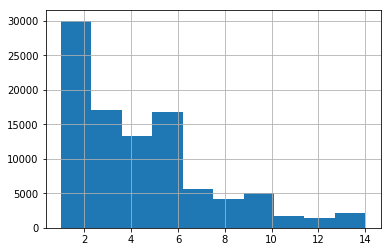

In [32]:
df['time_in_hospital'].hist()

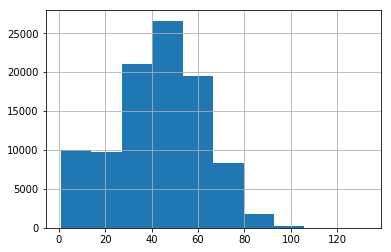

In [33]:
df['num_lab_procedures'].hist()

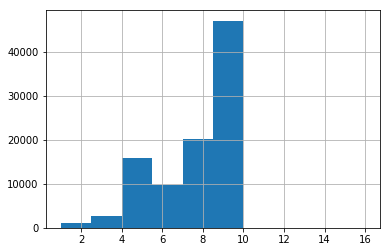

In [34]:
df['number_diagnoses'].hist()

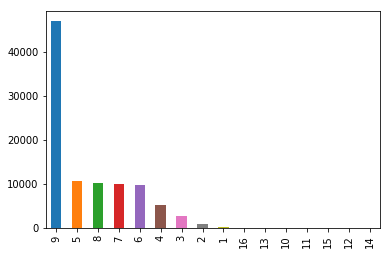

In [35]:
df['number_diagnoses'].value_counts().plot.bar()

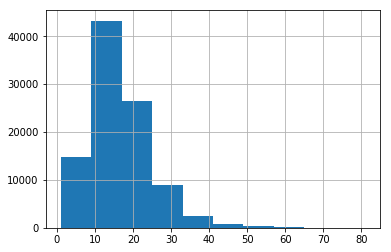

In [36]:
df['num_medications'].hist()

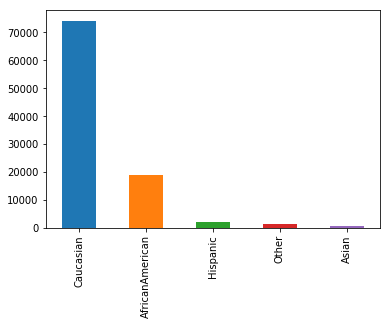

In [37]:
df['race'].value_counts().plot.bar()

#### Let us add a column 'comorbidity' as defined in the problem statement . To achieve this first we will create a new dataframe using diag_1 , diag_2 and diag_3 of the original data set.

In [38]:
diagnosis=df[['diag_1', 'diag_2', 'diag_3']]
diagnosis.head(10)

,diag_1,diag_2,diag_3
0,250.83,?,?
1,276,250.01,255
2,648,250,V27
3,8,250.43,403
4,197,157,250
5,414,411,250
6,414,411,V45
7,428,492,250
8,398,427,38
9,434,198,486


In [39]:
# Replace all '?' with 0
diagnosis = diagnosis.replace('?',0)
diagnosis.head(10)

,diag_1,diag_2,diag_3
0,250.83,0,0
1,276,250.01,255
2,648,250,V27
3,8,250.43,403
4,197,157,250
5,414,411,250
6,414,411,V45
7,428,492,250
8,398,427,38
9,434,198,486


### Now let us define a function to calculate comorbidity

In [40]:
import  re
def calculate_Comorbidity(row):
    diabetes_code = "^[2][5][0]"
    circulatory_code = "^[3][9][0-9]|^[4][0-5][0-9]"
    value =0
    
    if  (   not(bool(re.match(diabetes_code,str(np.array(row['diag_1']))))) and
            not(bool(re.match(diabetes_code,str(np.array(row['diag_2'])))))and 
            not(bool(re.match(diabetes_code,str(np.array(row['diag_3'])))))
        ) and (not(bool(re.match(circulatory_code,str(np.array(row['diag_1']))))) and 
              not(bool(re.match(circulatory_code,str(np.array(row['diag_2'])))))and 
              not(bool(re.match(circulatory_code,str(np.array(row['diag_3'])))))
        ):
        value= 0
    if (  bool(re.match(diabetes_code,str(np.array(row['diag_1'])))) or 
          bool(re.match(diabetes_code,str(np.array(row['diag_2'])))) or 
          bool(re.match(diabetes_code,str(np.array(row['diag_3']))))
         )and (not(bool(re.match(circulatory_code,str(np.array(row['diag_1']))))) and 
              not(bool(re.match(circulatory_code,str(np.array(row['diag_2']))))) and 
              not(bool(re.match(circulatory_code,str(np.array(row['diag_3'])))))
         ): value= 1
        
    if (   not(bool(re.match(diabetes_code,str(np.array(row['diag_1']))))) and
            not(bool(re.match(diabetes_code,str(np.array(row['diag_2'])))))and 
            not(bool(re.match(diabetes_code,str(np.array(row['diag_3'])))))
        ) and (bool(re.match(circulatory_code,str(np.array(row['diag_1'])))) or 
               bool(re.match(circulatory_code,str(np.array(row['diag_2'])))) or 
               bool(re.match(circulatory_code,str(np.array(row['diag_3']))))
         ):
          value= 2
    if (  bool(re.match(diabetes_code,str(np.array(row['diag_1'])))) or 
          bool(re.match(diabetes_code,str(np.array(row['diag_2'])))) or 
          bool(re.match(diabetes_code,str(np.array(row['diag_3']))))
         )and (bool(re.match(circulatory_code,str(np.array(row['diag_1'])))) or 
               bool(re.match(circulatory_code,str(np.array(row['diag_2'])))) or 
               bool(re.match(circulatory_code,str(np.array(row['diag_3']))))
         ):
            value= 3 
    
    return value

In [41]:
df['comorbidity'] = diagnosis.apply(calculate_Comorbidity, axis=1)

In [42]:
df['comorbidity'][0:10]

0    1
1    1
2    1
3    3
4    1
5    3
6    2
7    3
8    2
9    2
Name: comorbidity, dtype: int64

In [43]:
pd.crosstab(df['readmitted'], df['comorbidity'], margins=True)

comorbidity,0,1,2,3,All
readmitted,,,,,
0,11857,10386,19359,9416,51018
1,10080,8733,19063,8214,46090
All,21937,19119,38422,17630,97108


#### Plotting number_inpatient vs comorbidity

In [44]:
pd.crosstab(df['number_inpatient'], df['comorbidity']).head()

comorbidity,0,1,2,3
number_inpatient,,,,
0,14298,13141,24689,12325
1,4388,3239,7936,3128
2,1666,1272,3114,1154
3,750,605,1406,474
4,377,315,639,229


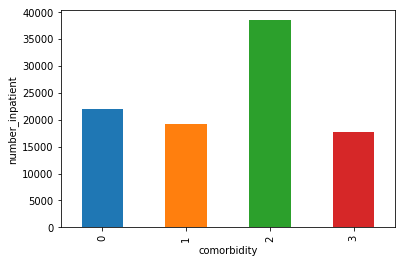

In [45]:
pd.crosstab(df['number_inpatient'], df['comorbidity']).sum().plot.bar()
plt.ylabel('number_inpatient')
plt.show()

#### Plotting number_inpatient vs A1Cresult

In [46]:
pd.crosstab(df['number_inpatient'], df['A1Cresult']).head()

A1Cresult,>7,>8,None,Norm
number_inpatient,,,,
0,2784,5855,52222,3592
1,550,1133,16217,791
2,201,455,6294,256
3,78,222,2826,109
4,36,92,1383,49


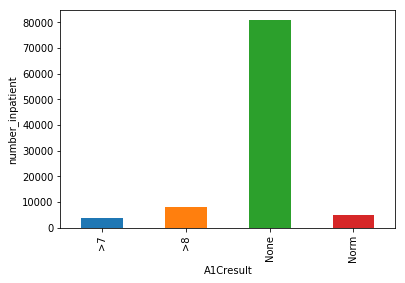

In [47]:
pd.crosstab(df['number_inpatient'], df['A1Cresult']).sum().plot.bar()
plt.ylabel('number_inpatient')
plt.show()

#### Plotting number_emergency vs comorbidity

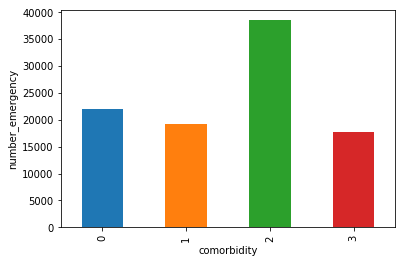

In [48]:
pd.crosstab(df['number_emergency'], df['comorbidity']).sum().plot.bar()
plt.ylabel('number_emergency')
plt.show()

#### Box Plot

In [49]:
pd.crosstab(df['time_in_hospital'], df['readmitted']).head()

readmitted,0,1
time_in_hospital,,
1,7959,5542
2,9009,7506
3,9183,7841
4,6785,6585
5,4842,4706


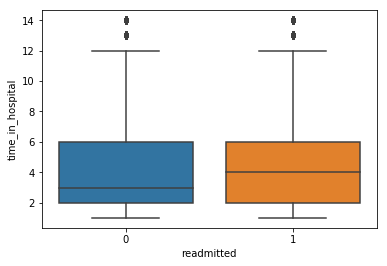

In [50]:
sns.boxplot(x="readmitted", y="time_in_hospital", data=df)

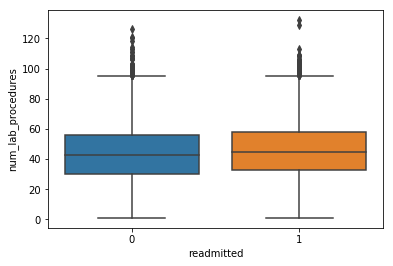

In [51]:
sns.boxplot(x="readmitted", y="num_lab_procedures", data=df)

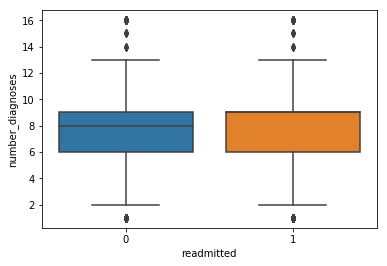

In [52]:
sns.boxplot(x="readmitted", y="number_diagnoses", data=df)

In [53]:
df.groupby(['comorbidity'])['number_inpatient'].mean().T

comorbidity
0    0.657063
1    0.669177
2    0.648509
3    0.560182
Name: number_inpatient, dtype: float64

In [54]:
# After having comorbidity column we can drop columns diag_1 , diag_2 and diag_3
df = df.drop(columns=["diag_1", "diag_2" , "diag_3"])
df.shape

(97108, 44)

### Feature Engineering

The dataset contains 23 features for 23 drugs ( Out of which we already dropped 1 "citoglipton")  which indicate for each of these, whether a change in that medication was made or not during the current hospital stay of patient. We can count how many changes were made in total for each patient, and declared that a new feature. This may help in discovering a relationship with number of changes regardless of which drug was changed. 

In [55]:
keys = ['miglitol', 'repaglinide',  'chlorpropamide', 'acetohexamide','glimepiride', 'glipizide', 'glyburide', 
        'pioglitazone', 'rosiglitazone', 'acarbose', 'metformin', 'tolbutamide','insulin', 'glyburide-metformin', 'tolazamide', 
        'metformin-pioglitazone','metformin-rosiglitazone', 'nateglinide','glimepiride-pioglitazone', 
        'glipizide-metformin', 'troglitazone', 'examide']

In [56]:
for col in keys:
    colname = str(col) + 'temp'
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)

df['num_of_change'] = 0

for col in keys:
    colname = str(col) + 'temp'
    df['num_of_change'] = df['num_of_change'] + df[colname]
    del df[colname]
    

In [57]:
df['num_of_change'].value_counts()

0    70632
1    25086
2     1279
3      106
4        5
Name: num_of_change, dtype: int64

#### Let us change the value of drugs columns to reflect whether that medicine is being given to a patient or not

In [58]:
for col in keys:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1) 

###### Now based on the above we create one more column to reflect how many medicine is being administered to a patient

In [59]:
df['num_of_med'] = 0

for col in keys:
    df['num_of_med'] = df['num_of_med'] + df[col]
df['num_of_med'].value_counts()

1    44960
0    22235
2    21046
3     7506
4     1299
5       57
6        5
Name: num_of_med, dtype: int64

##### After having 'num_of_med' column and 'num_of_change' column we drop all medicine columns to simplyfy the model 

In [60]:
df = df.drop(columns=keys)
df.shape

(97108, 24)

Let us convert both A1C test result and Glucose serum test result into numbers.

In [61]:
df['A1Cresult'] = df['A1Cresult'].replace('>7', 1)
df['A1Cresult'] = df['A1Cresult'].replace('>8', 2)
df['A1Cresult'] = df['A1Cresult'].replace('Norm', 0)
df['A1Cresult'] = df['A1Cresult'].replace('None', -1) #84748 rows are None
# 1: test result is  abnormal
# 2: test result is  very abnormal

df['max_glu_serum'] = df['max_glu_serum'].replace('>200', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('>300', 2)
df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 0)
df['max_glu_serum'] = df['max_glu_serum'].replace('None', -1)
# 1: test result is  abnormal
# 2: test result is  very abnormal

For gender, race, medication change string data type is used. To better fit those variables into our model, we interpret the variables to numeric binary variables to reflect their nature. For example, we encoded the “medication change” feature from “No” (no change) and “Ch” (changed) into 0 and 1.

In [62]:
# code the non-numeric values
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)

df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)

df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)

In [63]:
df.shape

(97108, 24)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97108 entries, 0 to 101765
Data columns (total 24 columns):
encounter_id                97108 non-null int64
patient_nbr                 97108 non-null int64
race                        97108 non-null object
gender                      97108 non-null int64
age                         97108 non-null int64
admission_type_id           97108 non-null int64
discharge_disposition_id    97108 non-null int64
admission_source_id         97108 non-null int64
time_in_hospital            97108 non-null int64
num_lab_procedures          97108 non-null int64
num_procedures              97108 non-null int64
num_medications             97108 non-null int64
number_outpatient           97108 non-null int64
number_emergency            97108 non-null int64
number_inpatient            97108 non-null int64
number_diagnoses            97108 non-null int64
max_glu_serum               97108 non-null int64
A1Cresult                   97108 non-null int64
change 

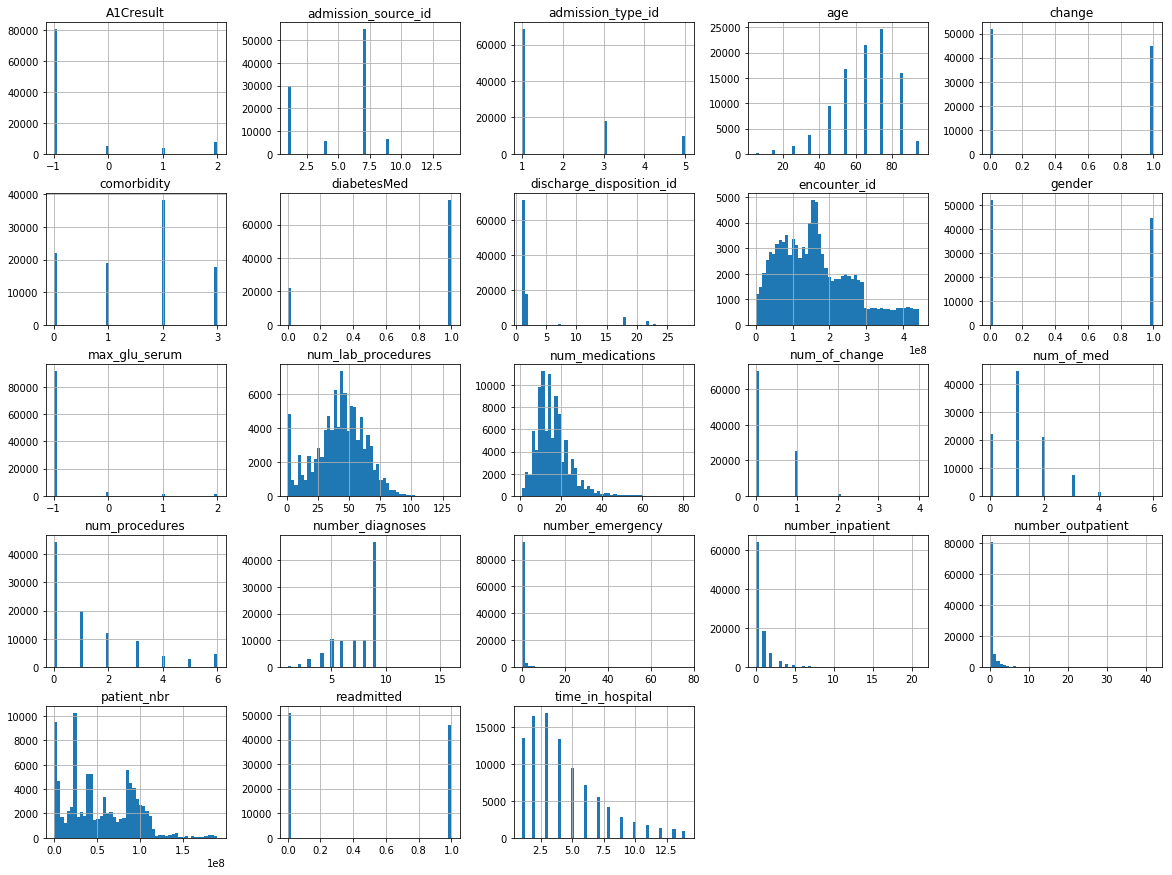

In [65]:
#Plotting the numerical variables in our dataset,

%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [66]:
# get list of only numeric features
numerics = list(set(list(df._get_numeric_data().columns))- {'readmitted'})

In [67]:
numerics

['number_inpatient',
 'num_lab_procedures',
 'discharge_disposition_id',
 'comorbidity',
 'age',
 'gender',
 'number_diagnoses',
 'encounter_id',
 'A1Cresult',
 'patient_nbr',
 'number_outpatient',
 'diabetesMed',
 'num_procedures',
 'max_glu_serum',
 'change',
 'admission_type_id',
 'num_of_med',
 'num_medications',
 'num_of_change',
 'number_emergency',
 'time_in_hospital',
 'admission_source_id']

In [68]:
# Create service utilization as a new feature
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

In [69]:
# get list of only numeric features
numerics = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
numerics

['number_inpatient',
 'num_lab_procedures',
 'discharge_disposition_id',
 'comorbidity',
 'age',
 'gender',
 'number_diagnoses',
 'encounter_id',
 'A1Cresult',
 'patient_nbr',
 'number_outpatient',
 'service_utilization',
 'diabetesMed',
 'num_procedures',
 'max_glu_serum',
 'change',
 'admission_type_id',
 'num_of_med',
 'num_medications',
 'num_of_change',
 'number_emergency',
 'time_in_hospital',
 'admission_source_id']

In [70]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                       int64
age                          int64
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
number_diagnoses             int64
max_glu_serum                int64
A1Cresult                    int64
change                       int64
diabetesMed                  int64
readmitted                   int32
comorbidity                  int64
num_of_change                int64
num_of_med                   int64
service_utilization          int64
dtype: object

In [71]:
df.drop(['encounter_id', 'patient_nbr'], axis=1, inplace=True)

In [72]:
df.shape

(97108, 23)

In [73]:
#Normalization of the data,

listnormal = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                     'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

from sklearn.preprocessing import StandardScaler

normal = StandardScaler()

df[listnormal] = normal.fit_transform(df[listnormal])

df.describe()

C:\Users\govindam.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\govindam.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidity,num_of_change,num_of_med,service_utilization
count,97108.000000,97108.000000,97108.000000,97108.000000,97108.000000,9.710800e+04,9.710800e+04,9.710800e+04,9.710800e+04,9.710800e+04,...,9.710800e+04,97108.000000,97108.000000,97108.000000,97108.000000,97108.000000,97108.000000,97108.000000,97108.000000,97108.000000
mean,0.461054,65.729909,1.790131,2.614337,5.129083,5.595486e-14,1.134278e-15,-1.684811e-14,7.666859e-16,7.562131e-14,...,1.414345e-13,-0.908823,-0.630566,0.463783,0.771028,0.474626,1.532860,0.288153,1.185083,1.213741
std,0.498483,15.948321,1.334793,4.906681,2.881813,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,...,1.000005e+00,0.429516,0.892271,0.498689,0.420173,0.499358,1.031425,0.488500,0.922879,2.311281
min,0.000000,5.000000,1.000000,1.000000,1.000000,-1.138528e+00,-2.133609e+00,-7.850735e-01,-1.852961e+00,-2.928447e-01,...,-3.319441e+00,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,55.000000,1.000000,1.000000,1.000000,-8.018176e-01,-6.053154e-01,-7.850735e-01,-7.399815e-01,-2.928447e-01,...,-7.336865e-01,-1.000000,-1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,0.000000,65.000000,1.000000,1.000000,7.000000,-1.283971e-01,5.694510e-02,-1.971115e-01,-1.216599e-01,-2.928447e-01,...,3.006151e-01,-1.000000,-1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000
75%,1.000000,75.000000,3.000000,2.000000,7.000000,5.450235e-01,7.192056e-01,3.908505e-01,4.966618e-01,-2.928447e-01,...,8.177659e-01,-1.000000,-1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000
max,1.000000,95.000000,5.000000,28.000000,14.000000,3.238706e+00,4.539940e+00,2.742698e+00,8.040186e+00,3.265641e+01,...,4.437821e+00,2.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,6.000000,80.000000


In [74]:
df.shape

(97108, 23)

In [75]:
#Let's store readmitted in label and rest of the columns in Data,

label = df['readmitted']
Data = df.drop(['readmitted'], axis =1)
Data = pd.get_dummies(Data)

In [76]:
Data.shape

(97108, 26)

In [77]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split( Data, label, test_size = .2, random_state = 0 , stratify = label )

In [78]:
print("shape of Xtrain,Xtest:",Xtrain.shape,Xtest.shape)

shape of Xtrain,Xtest: (77686, 26) (19422, 26)


# 1. Logistic Regression

In [79]:
#  logistic regression using Sklearn 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(tol=1e-7, penalty='l2', C=0.0005,solver='liblinear')
lr.fit(Xtrain, Ytrain)
lr_Y_pred = lr.predict(Xtest)
lr_predict_proba =lr.predict_proba(Xtest)[:,1] # Required for roc

In [80]:
# Checking the accuracy of the model 
lr_accuracy = lr.score(Xtest, Ytest)*100
print(" The % accuracy of the Logistic regression model:" ,lr_accuracy)

 The % accuracy of the Logistic regression model: 62.00700236844815


In [81]:
# checking the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ytest, lr_Y_pred))

[[7965 2239]
 [5140 4078]]


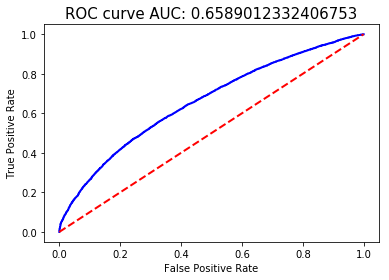

In [82]:
##Computing false and true positive rates
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
lr_fpr, lr_tpr, thresholds = roc_curve(Ytest, lr_predict_proba)#logistic regression
#fpr, tpr,_=roc_curve(lr.predict(Xtrain),Ytrain,drop_intermediate=False)
lr_roc_auc = metrics.auc(lr_fpr, lr_tpr)
import matplotlib.pyplot as plt
plt.figure()
##Creating the ROC,
plt.plot(lr_fpr, lr_tpr, color='blue',
 lw=2, label='ROC curve')
##Finding FPR and TPR,
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
##Splecifying the label and title,
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plot_title = 'ROC curve AUC: {0}'.format(lr_roc_auc)
plt.title(plot_title , size=15)
plt.show()

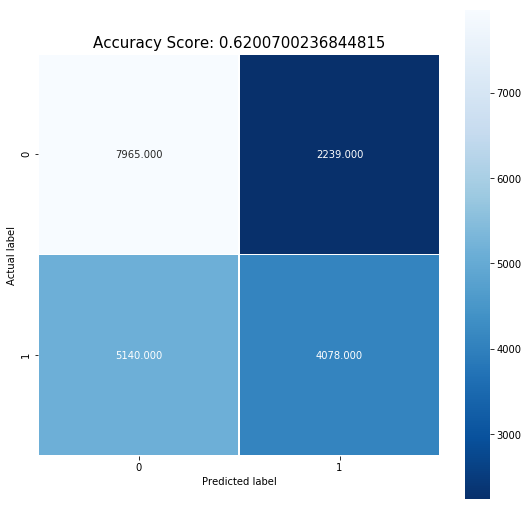

In [83]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, lr_Y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(lr.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

In [84]:
# Checking the summary of classification
from sklearn.metrics import classification_report
print(classification_report(Ytest, lr_Y_pred, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.61      0.78      0.68     10204
         YES       0.65      0.44      0.53      9218

   micro avg       0.62      0.62      0.62     19422
   macro avg       0.63      0.61      0.60     19422
weighted avg       0.63      0.62      0.61     19422



### Feature Importance 

In [85]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = Xtrain.columns
vif['VIF'] = [variance_inflation_factor(Xtrain.values, i) for i in range(Xtrain.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = True)
vif

C:\Users\govindam.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,gender,1.020000
3,discharge_disposition_id,1.030000
17,comorbidity,1.070000
14,A1Cresult,1.130000
1,age,1.190000
12,number_diagnoses,1.250000
4,admission_source_id,1.250000
7,num_procedures,1.270000
6,num_lab_procedures,1.310000
2,admission_type_id,1.340000


In [86]:
vif['Features']

0                       gender
3     discharge_disposition_id
17                 comorbidity
14                   A1Cresult
1                          age
12            number_diagnoses
4          admission_source_id
7               num_procedures
6           num_lab_procedures
2            admission_type_id
13               max_glu_serum
5             time_in_hospital
8              num_medications
18               num_of_change
16                 diabetesMed
15                      change
19                  num_of_med
11            number_inpatient
10            number_emergency
9            number_outpatient
20         service_utilization
21        race_AfricanAmerican
22                  race_Asian
23              race_Caucasian
24               race_Hispanic
25                  race_Other
Name: Features, dtype: object

# 2. Random Forest Classifier

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
random_forest = RandomForestClassifier(random_state=42,n_estimators=100,min_samples_split =10)
gridparam ={
        'n_estimators': [100, 200,500],
        'min_samples_split': [5,10,15],
},
rf = GridSearchCV(random_forest, cv=3, param_grid=gridparam)
rf.fit(Xtrain, Ytrain)
rf_Y_pred = rf.predict(Xtest)
rf_predict_proba =rf.predict_proba(Xtest)[:,1] # Required for roc

In [88]:
#Checking the accuracy,
rf_accuracy=rf.score(Xtest, Ytest)*100
print(" % Accuracy of Randomeforest classification: ",rf_accuracy )

 % Accuracy of Randomeforest classification:  62.789620018535686


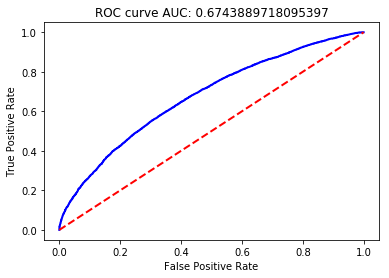

In [89]:
##Computing false and true positive rates
from sklearn.metrics import roc_curve 
import sklearn.metrics as metrics
rf_fpr, rf_tpr, thresholds = roc_curve(Ytest, rf_predict_proba) #Random Forest Classifier
#fpr, tpr,_=roc_curve(lr.predict(Xtrain),Ytrain,drop_intermediate=False)
rf_roc_auc = metrics.auc(rf_fpr, rf_tpr)
import matplotlib.pyplot as plt
plt.figure()
##Creating the ROC,
plt.plot(rf_fpr, rf_tpr, color='blue',
 lw=2, label='ROC curve')
##Finding FPR and TPR,
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
##Splecifying the label and title,
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plot_title = 'ROC curve AUC: {0}'.format(rf_roc_auc)
plt.title(plot_title)
plt.show()

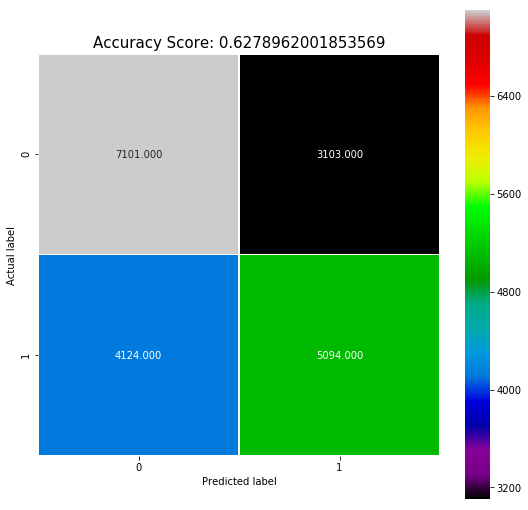

In [90]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, rf_Y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'nipy_spectral');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(rf.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

In [91]:
# Checking the summary of classification
from sklearn.metrics import classification_report
print(classification_report(Ytest, rf_Y_pred, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.63      0.70      0.66     10204
         YES       0.62      0.55      0.59      9218

   micro avg       0.63      0.63      0.63     19422
   macro avg       0.63      0.62      0.62     19422
weighted avg       0.63      0.63      0.63     19422



In [92]:
importances = rf.best_estimator_.feature_importances_
importances

array([0.01974809, 0.06571742, 0.02239748, 0.03511893, 0.03120878,
       0.07971595, 0.14336045, 0.05291677, 0.11964646, 0.01962684,
       0.0186827 , 0.06885159, 0.05952245, 0.01011096, 0.02720706,
       0.01071611, 0.00753831, 0.04095217, 0.01638522, 0.03205401,
       0.07921606, 0.01226323, 0.00277338, 0.01336832, 0.00580586,
       0.00509541])

### Feature Importance

In [93]:
feature_importances = pd.DataFrame(rf.best_estimator_.feature_importances_,
                                   index = Xtrain.columns,
                                   columns=['importance']).sort_values('importance', ascending=False) 
feature_importances

,importance
num_lab_procedures,0.143360
num_medications,0.119646
time_in_hospital,0.079716
service_utilization,0.079216
number_inpatient,0.068852
age,0.065717
number_diagnoses,0.059522
num_procedures,0.052917
comorbidity,0.040952
discharge_disposition_id,0.035119


# 3. Decision Tree Classifier

In [94]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [95]:

dte = DecisionTreeClassifier(max_depth=5, criterion = "gini", min_samples_split=5)
gridparam ={
       'criterion' : ['gini','entropy'],
       'max_depth' : [5, 10,15],
       'min_samples_split': [5,10,15]
},
#gridparam={
 #       'min_samples_split' : range(10,500,20),
#        'max_depth'         : range(1,20,2)
#        'criterion'         : range ('gini','entropy')
#}
dt = GridSearchCV(dte, cv=3, param_grid=gridparam)
dt.fit(Xtrain, Ytrain)
dt_Y_pred = dt.predict(Xtest)
dt_predict_proba =dt.predict_proba(Xtest)[:,1] # Required for roc
#print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(dt, Xtrain, Ytrain, cv=10))))
#print("Dev Set score: {:.2%}".format(dt.score(Xtest, Ytest)))

In [96]:
#Checking the accuracy,
dt_accuracy=dt.score(Xtest, Ytest)*100
print(" % Accuracy of Decision Tree classification: ",dt_accuracy )

 % Accuracy of Decision Tree classification:  62.362269591185246


In [97]:
print(dt.best_score_)
print(dt.best_params_)

0.6183997116597585
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5}


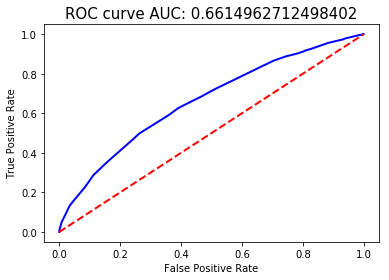

In [98]:
##Computing false and true positive rates
from sklearn.metrics import roc_curve 
import sklearn.metrics as metrics
dt_fpr, dt_tpr, thresholds = roc_curve(Ytest, dt_predict_proba) #Random Forest Classifier
#fpr, tpr,_=roc_curve(lr.predict(Xtrain),Ytrain,drop_intermediate=False)
dt_roc_auc = metrics.auc(dt_fpr, dt_tpr)
import matplotlib.pyplot as plt
plt.figure()
##Creating the ROC,
plt.plot(dt_fpr, dt_tpr, color='blue',lw=2, label='ROC curve')
##Finding FPR and TPR,
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
##Splecifying the label and title,
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plot_title = 'ROC curve AUC: {0}'.format(dt_roc_auc)
plt.title(plot_title, size=15)
plt.show()

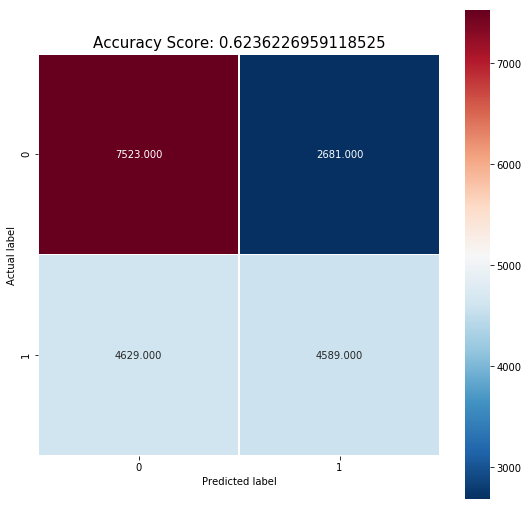

In [99]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, dt_Y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'RdBu_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plot_title = 'Accuracy Score: {0}'.format(dt.score(Xtest, Ytest))
plt.title(plot_title, size = 15);

In [100]:
# Checking the summary of classification
from sklearn.metrics import classification_report
print(classification_report(Ytest, dt_Y_pred, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.62      0.74      0.67     10204
         YES       0.63      0.50      0.56      9218

   micro avg       0.62      0.62      0.62     19422
   macro avg       0.63      0.62      0.61     19422
weighted avg       0.62      0.62      0.62     19422



### Feature Importance

In [101]:
feature_importances = pd.DataFrame(dt.best_estimator_.feature_importances_,
                                   index = Xtrain.columns,
                                   columns=['importance']).sort_values('importance', ascending=False) 
feature_importances

,importance
service_utilization,0.625033
number_inpatient,0.162839
number_diagnoses,0.083085
age,0.039304
admission_source_id,0.031872
diabetesMed,0.027685
num_medications,0.008597
num_lab_procedures,0.006441
discharge_disposition_id,0.005494
time_in_hospital,0.004585


# 4. AdaBoost Classifier

In [102]:
# Doing parameter tuning,
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

ada_boost = AdaBoostClassifier(n_estimators = 20, learning_rate = 0.2, random_state = 123)
gridparam ={
        'n_estimators': [100,200,500],
        'learning_rate': [0.2,0.5,1.0],
},
ab = GridSearchCV(ada_boost,cv=3,n_jobs=3, param_grid=gridparam)
ab.fit(Xtrain, Ytrain)
ab_Y_pred = dt.predict(Xtest)
ab_predict_proba =dt.predict_proba(Xtest)[:,1] # Required for roc

In [103]:
#Checking the accuracy,
ab_accuracy=dt.score(Xtest, Ytest)*100
print(" % Accuracy of AdaBoost  classifier: ",ab_accuracy )

 % Accuracy of AdaBoost  classifier:  62.362269591185246


In [104]:
print(ab.best_score_)
print(ab.best_params_)

0.6265350256159411
{'learning_rate': 0.5, 'n_estimators': 500}


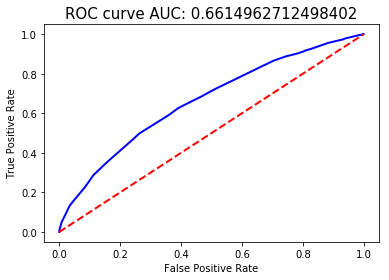

In [105]:
##Computing false and true positive rates
from sklearn.metrics import roc_curve 
import sklearn.metrics as metrics
ab_fpr, ab_tpr, thresholds = roc_curve(Ytest, ab_predict_proba) #AdaBoost Classifier
ab_roc_auc = metrics.auc(ab_fpr, ab_tpr)
import matplotlib.pyplot as plt
plt.figure()
##Creating the ROC,
plt.plot(ab_fpr, ab_tpr, color='blue',lw=2, label='ROC curve')
##Finding FPR and TPR,
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
##Splecifying the label and title,
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plot_title = 'ROC curve AUC: {0}'.format(ab_roc_auc)
plt.title(plot_title, size=15)
plt.show()

### Feature Importance

In [106]:
feature_importances = pd.DataFrame(ab.best_estimator_.feature_importances_,
                                   index = Xtrain.columns,
                                   columns=['importance']).sort_values('importance', ascending=False) 
feature_importances

,importance
num_lab_procedures,0.128
admission_source_id,0.126
service_utilization,0.114
number_inpatient,0.104
number_outpatient,0.080
num_medications,0.078
number_emergency,0.060
discharge_disposition_id,0.048
admission_type_id,0.040
A1Cresult,0.040


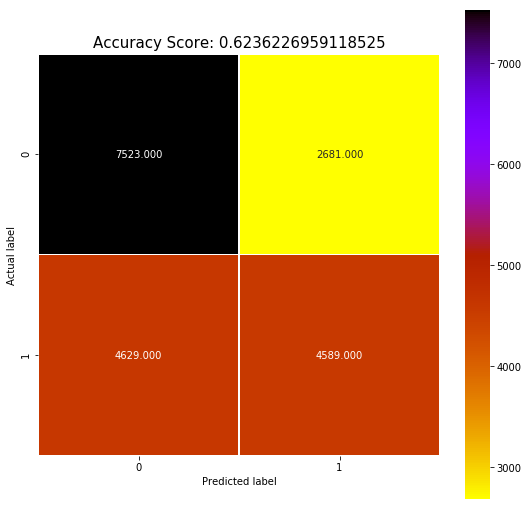

In [107]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, ab_Y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'gnuplot_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plot_title = 'Accuracy Score: {0}'.format(dt.score(Xtest, Ytest))
plt.title(plot_title, size = 15);

C:\Users\govindam.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0, 0.5, 'True Positive Rate')

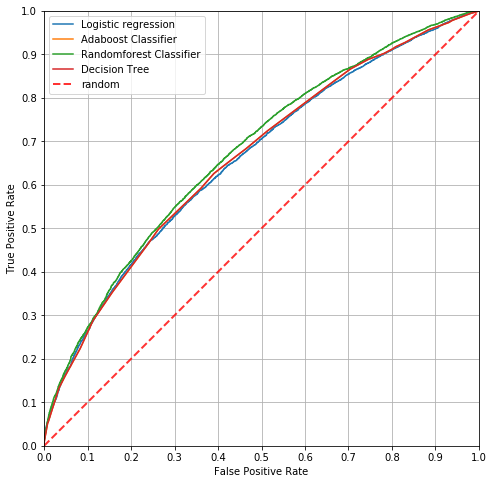

In [108]:
#compare the ROC curve between different models
plt.figure(figsize=(8,8))
plt.plot(lr_fpr, lr_tpr, label='Logistic regression')
plt.plot(ab_fpr, ab_tpr, label='Adaboost Classifier')
plt.plot(rf_fpr, rf_tpr, label='Randomforest Classifier')
plt.plot(dt_fpr, dt_tpr, label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='random', alpha=.8)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.grid()
plt.legend()
plt.axes().set_aspect('equal')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [109]:
score = [    (lr_accuracy, lr_roc_auc) ,
             (rf_accuracy, rf_roc_auc) ,
             (dt_accuracy, dt_roc_auc) ,
             (ab_accuracy, ab_roc_auc)     ]
df_score = pd.DataFrame(score, columns = ['Accuracy' , 'AUC'], index=['LogisticRegression','RandomForest','DecisionTree','AdaBoost']) 

In [110]:
df_score

,Accuracy,AUC
LogisticRegression,62.007002,0.658901
RandomForest,62.789620,0.674389
DecisionTree,62.362270,0.661496
AdaBoost,62.362270,0.661496


### Risk Stratification

Using Random Forest as a final model as it has the highest accuracy and AUC accuracy. 

In [111]:
rf_predict_proba

array([0.20962555, 0.60921484, 0.53788101, ..., 0.47440573, 0.75970847,
       0.34542703])

In [112]:
risk_bucket_df=pd.DataFrame(rf_predict_proba,columns = ['Probability'])
risk_bucket_df['Probability'][(risk_bucket_df['Probability']<0.3)].count()

2742

In [113]:
def classify_risk(row):
    if row[0] <= 0.3 : return 'LOW'
    if row[0] >= 0.7 : return 'HIGH'
    return 'MEDIUM'

In [114]:
Risk_Bucket = pd.DataFrame()
Risk_Bucket['Risk']= risk_bucket_df.apply(classify_risk, axis=1)

In [115]:
Risk_Bucket['Risk'].value_counts()

MEDIUM    14846
LOW        2742
HIGH       1834
Name: Risk, dtype: int64

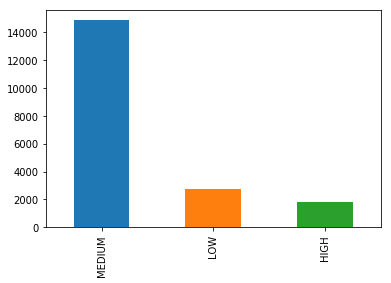

In [116]:
Risk_Bucket['Risk'].value_counts().plot.bar()